# k-최근접 이웃 회귀

## 데이터 준비

In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

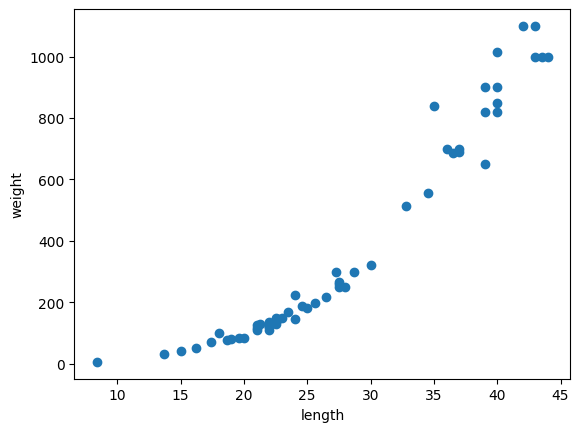

In [2]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [4]:
# reshape(): 배열(array)의 형태(shape)를 변경할 때 사용
# array.reshape(new_shape)
# new_shape: 튜플 형태로 원하는 배열의 새 구조를 지정. 예: (2, 3) → 2행 3열
# 하나의 차원을 -1로 지정하면, 나머지 값에 따라 자동 계산됨
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 결정계수(R^2)

In [5]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(test_input, test_target)  # 결정계수

0.992809406101064

In [6]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 생성
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
mae

19.157142857142862

## 과대적합 vs 과소적합

In [7]:
knr.score(train_input, train_target)  # 과소적합 발생 -> 모델을 조금 더 복잡하게 만들 필요가 있음

0.9698823289099254

In [8]:
# 이웃의 개수를 3으로 설정
knr.n_neighbors = 3

# 모델을 다시 훈련
knr.fit(train_input, train_target)
knr.score(train_input, train_target)

0.9804899950518966

In [9]:
knr.score(test_input, test_target)

0.9746459963987609

# 선형 회귀

## k-최근접 이웃의 한계

In [10]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [11]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꿈
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [12]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

# 길이가 50cm인 농어의 무게 예측
knr.predict([[50]])

array([1033.33333333])

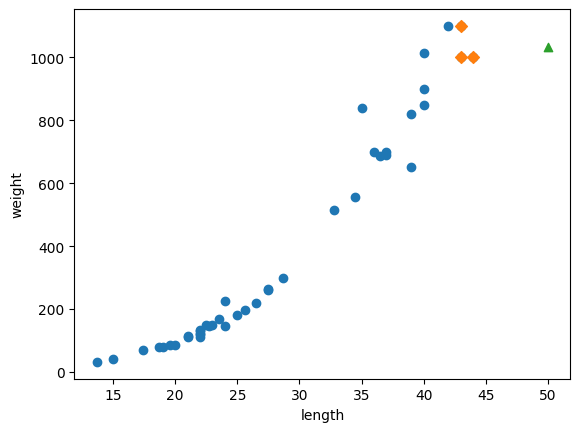

In [13]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구함
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그림
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [14]:
print(np.mean(train_target[indexes]))  # 길이가 길어질수록 무게도 늘어나야 하지만, 샘플들의 평균 무게로 회귀함

1033.3333333333333


## 선형 회귀

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측
print(lr.predict([[50]]))

[1241.83860323]


In [16]:
print(lr.coef_, lr.intercept_)  # 모델 파라미터(coefficient:기울기, intercept: y절편)

[39.01714496] -709.0186449535477


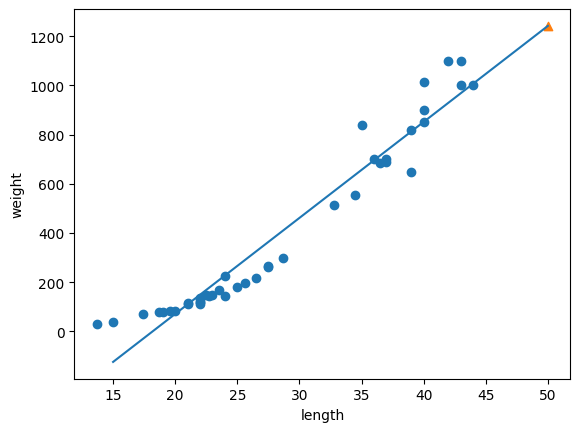

In [17]:
# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그림
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker ='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [18]:
print(lr.score(train_input, train_target))  # 훈련 세트
print(lr.score(test_input, test_target))    # 테스트 세트

0.939846333997604
0.8247503123313558


## 다항 회귀

In [19]:
train_poly = np.column_stack((train_input ** 2, train_input))  # 다항 방정식을 생성하기 위해 제곱 투입
test_poly = np.column_stack((test_input ** 2, test_input))

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련
lr.fit(train_poly, train_target)

# 50cm 농어에 대해 예측
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [21]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


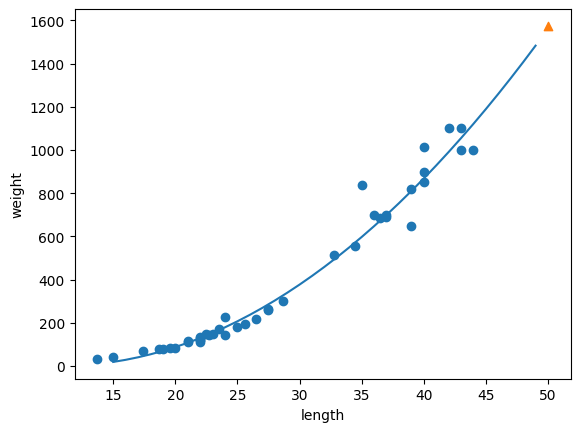

In [22]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열 생성
point = np.arange(15, 50)

# 훈련 세트의 산점도
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그림
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker ='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [23]:
print(lr.score(train_poly, train_target))  # 훈련 세트
print(lr.score(test_poly, test_target))    # 테스트 세트

0.9706807451768623
0.9775935108325122


# 특성 공학과 규제

## 데이터 준비

In [24]:
import pandas as pd

perch_full = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [25]:
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [26]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

## 사이킷런의 변환기

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
# 타깃 데이터 불필요 -> 기본적으로 각 특성을 제곱한 항, 특성끼리 곱한 항, 1 추가
poly = PolynomialFeatures()
poly.fit([[2, 3]])       # fit(): 새롭게 만들 특성 조합 찾기
poly.transform([[2,3]])  # transform(): 실제로 데이터를 변환

array([[1., 2., 3., 4., 6., 9.]])

In [29]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
poly.transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

In [30]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(42, 9)

In [31]:
poly.get_feature_names_out()

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

## 다중 회귀 모델 훈련하기

In [32]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9903183436982125

In [33]:
lr.score(test_poly, test_target)

0.9714559911594111

In [34]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(42, 55)

In [35]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))  # 과대적합 발생

0.9999999999996433
-144.40579436844948


## 규제

In [36]:
# 규제하기 앞서 정규화 진행
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 릿지 회귀

In [37]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


In [38]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델 생성
    ridge = Ridge(alpha=alpha)
    # 릿지 모델 훈련
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

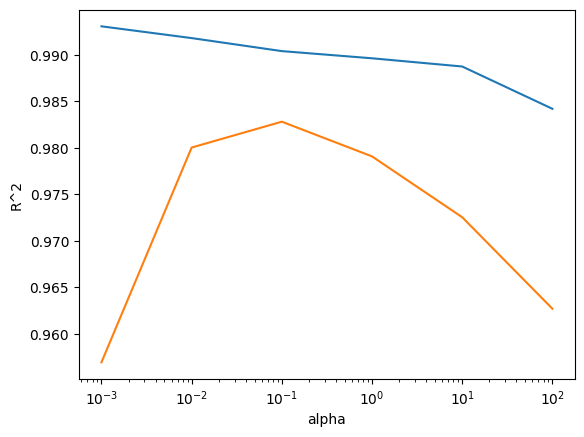

In [39]:
import matplotlib.pyplot as plt

plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()  # alpha가 0.1일 때, 테스트 점수가 가장 높음

In [40]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


## 라쏘 회귀

In [41]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


In [42]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델 생성
    lasso = Lasso(alpha=alpha, max_iter=100000000)  # 라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산 수행 -> max_iter 값 지정
    # 라쏘 모델 훈련
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

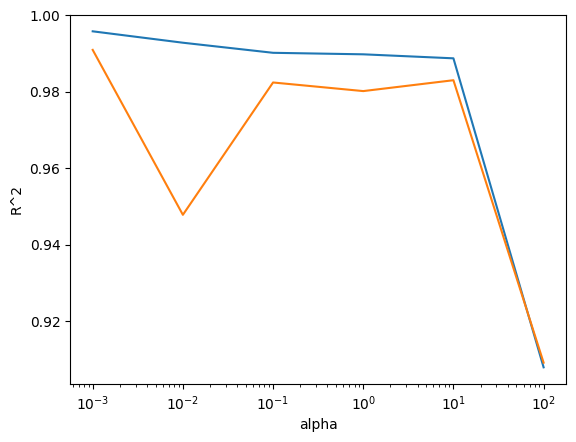

In [43]:
import matplotlib.pyplot as plt

plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()  # alpha가 10일 때, 테스트 점수가 가장 높음

In [44]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [45]:
# 라쏘 모델은 사용하지 않을 특성은 계수 값을 0으로 만들어버림
print(np.sum(lasso.coef_ == 0))

40
